<a href="https://colab.research.google.com/github/JacoboGGLeon/pipeline/blob/main/Auto%20Encoder%20k-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Clustering

### References

* [Deep Clustering for Financial Market Segmentation](https://towardsdatascience.com/deep-clustering-for-financial-market-segmentation-2a41573618cf)

* [Practical Guide to Cluster Analysis in R. Unsupervised Machine Learning](http://libgen.lc/ads.php?md5=7CBE43DE8C4F13ACDC7601338128BC36)

* [NbClust: NbClust Package for determining the best number of clusters](https://www.rdocumentation.org/packages/NbClust/versions/3.0/topics/NbClust)

* [Rpy2 Made Easy](https://medium.com/analytics-vidhya/rpy2-made-easy-d67a9c8b84c8)

* [R, Python: install packages on rpy2](https://stackoverflow.com/questions/11561258/r-python-install-packages-on-rpy2)

* [pyclustertend’s documentation](https://pyclustertend.readthedocs.io/en/latest/)

* [Determining The Optimal Number Of Clusters: 3 Must Know Methods](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#nbclust-function-30-indices-for-choosing-the-best-number-of-clusters)

* [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)

* [Dunn index and DB index – Cluster Validity indices](https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/)

* [Understanding of Internal Clustering Validation Measures](http://datamining.rutgers.edu/publication/internalmeasures.pdf)

## Notebook preparation

### Kaggle -Colab conection

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"raaad3000","key":"21586c1c11931acf39135768f747b7fd"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d palashiitk/mnist-dimen-reduction-using-randomized-pca

mnist-dimen-reduction-using-randomized-pca.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 autoencoder_no_compress.png  'kaggle (1).json'
 autoencoder_weights.h5        kaggle.json
 encoder.h5		       mnist-dimen-reduction-using-randomized-pca.zip
 encoder_no_compress.png       MnistDimensionalityReductionRandomized.csv
 encoder_weights.h5	       sample_data


In [ ]:
!unzip -q mnist-dimen-reduction-using-randomized-pca.zip -d .

replace ./MnistDimensionalityReductionRandomized.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls

 autoencoder_no_compress.png  'kaggle (1).json'
 autoencoder_weights.h5        kaggle.json
 encoder.h5		       mnist-dimen-reduction-using-randomized-pca.zip
 encoder_no_compress.png       MnistDimensionalityReductionRandomized.csv
 encoder_weights.h5	       sample_data


In [ ]:
!head 'MnistDimensionalityReductionRandomized.csv'

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
-661.5878077581496,-699.3289552229065,183.27851304171375,120.61000708732301,-81.07737163054558,489.4601666084057,-683.4707819970508,85.5590251206249,348.5478280471082,202.97600292379687,-364.5607499279813,21.265187776127952,404.4277105291551,-97.10046553892543,61.852216546655136,-86.77828742545734,17.648457273952804,285.485554930969,18.82438770800272,207.6371488744287,44.23884693581659,221.89653525174512,57.2380524326409,-148.67416229467645,14.344173378171934,-41.53685826086526,-333.734498

### Notebook requeriments

In [ ]:
!pip install pyclustertend

In [ ]:
!pip install metrics

## 1. Know Your Data

### Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

import missingno as msno
%matplotlib inline

In [ ]:
from time import time
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load data

In [ ]:
data = pd.read_csv('MnistDimensionalityReductionRandomized.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,-661.587808,-699.328955,183.278513,120.610007,-81.077372,489.460167,-683.470782,85.559025,348.547828,202.976003,-364.560750,21.265188,404.427711,-97.100466,61.852217,-86.778287,17.648457,285.485555,18.824388,207.637149,44.238847,221.896535,57.238052,-148.674162,14.344173,-41.536858,-333.734499,208.968789,59.819695,84.554542,6.943132,-5.299719,195.709140,-53.228767,-6.888296,-146.885454,-49.405749,-88.061060,-161.589642,-140.789859,...,3.774502,-1.268243,-15.798475,-0.812604,2.973247,67.024857,-5.402723,-11.620613,-18.205353,-13.182298,-10.494126,12.376677,-12.354726,-32.901971,46.101711,32.430292,33.650254,18.469369,-9.205237,10.476270,-11.472269,-16.748695,-31.039251,3.348615,-38.293373,21.051810,-26.009928,3.466377,-11.014800,5.850196,-55.618143,-0.507743,-8.449303,-46.514787,-0.528795,-29.302873,25.390772,1.726809,-4.642472,-31.764818
1,1701.458151,-360.555211,-501.805003,335.435636,-442.374674,738.398669,653.875620,-176.601781,-7.520090,67.846496,34.222472,46.552041,-70.482488,-342.685190,377.831625,-5.670672,317.768378,87.617761,-94.525582,-175.034433,-213.085053,-272.412576,7.168708,-22.634896,-34.608068,264.488432,-76.607510,14.018986,-80.422553,-87.681281,-27.818847,188.790966,115.952387,57.921737,-10.444427,-91.739232,-110.517335,-40.600726,111.845190,87.114357,...,57.298033,-76.501760,21.533885,40.905686,9.826845,-54.278566,-33.543512,65.112146,-23.192409,-9.759261,-34.971772,-67.073147,-47.812757,-52.312789,42.493270,21.866809,7.883970,34.848715,0.968307,59.503793,25.987163,14.279532,0.898243,-27.560183,17.886866,40.740884,-68.103698,-7.576196,22.545530,9.923350,9.432423,27.921923,-63.941839,-13.573094,-46.991057,19.138868,-55.025302,-11.734956,8.582015,92.071958
2,-886.888446,-293.790258,67.157423,78.276767,-473.715206,-323.544133,437.799100,-305.376527,-195.294810,-25.620816,367.599633,252.105979,54.541885,-58.599041,163.095188,-162.493315,-100.325260,-155.369387,70.210634,-182.801768,-104.941255,128.628153,152.011749,52.395716,-112.873962,88.153473,-229.584040,106.917839,-10.509363,121.364385,88.142765,40.684315,-48.922033,-118.052351,-16.874972,-1.797848,-51.817779,66.449338,-115.008012,-38.282540,...,24.497316,-22.416384,17.655077,21.335304,-29.488135,-28.807568,-3.323666,10.803076,4.533226,8.955788,-0.134701,-15.241233,-30.878692,31.895743,42.903040,40.519152,-44.057417,84.225938,-10.766378,26.487437,-0.109615,5.517030,-26.481883,-49.325448,-2.370258,12.979414,-41.256227,-2.416817,5.870114,43.582424,22.271367,-10.480952,8.753496,-6.294428,21.493711,-19.949988,25.578790,-39.242736,-1.039134,-5.897985
3,-165.755475,300.165838,-64.137156,759.721686,-425.831987,157.385376,-304.099035,276.406766,-45.867982,-295.480567,-2.749430,-256.882594,-87.757389,-175.351452,40.047610,-87.537266,54.278458,199.849259,-11.831418,298.085268,-232.165320,-89.852131,292.736302,125.822062,-68.701969,-193.418567,-184.243732,82.888501,214.453129,191.178173,-102.970142,-30.547189,116.252182,15.297558,117.493856,114.581161,-66.208897,74.663253,27.655090,119.076737,...,37.699030,-48.414819,95.884138,101.306897,51.178858,29.601321,-95.789468,18.283485,-24.470035,-12.947924,-26.676182,117.860393,24.148332,-65.789827,54.223079,-79.792092,-121.983822,-70.165130,111.503421,-17.775956,-14.283802,-0.117469,-60.495494,-14.700094,31.481911,6.655111,18.703607,94.342828,112.450706,57.345268,8.424172,13.696231,-28.954731,-18.386819,30.917789,-0.486917,0.770173,-48.415163,-51.503459,80.167914
4,1923.717025,-449.156592,-548.612933,188.571935,-651.735853,990.056369,564.507303,-255.916622,124.914831,177.567644,-19.488104,333.720567,-213.089301,-354.617074,93.460893,26.789854,233.002784,-54.736463,-45.337726,-256.206441,-15.653169,-131.148984,-140.324662,-56.932575,175.858809,-8.68601

In [ ]:
data.shape

(42000, 154)

### Copy data

In [ ]:
df = data.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,-661.587808,-699.328955,183.278513,120.610007,-81.077372,489.460167,-683.470782,85.559025,348.547828,202.976003,-364.560750,21.265188,404.427711,-97.100466,61.852217,-86.778287,17.648457,285.485555,18.824388,207.637149,44.238847,221.896535,57.238052,-148.674162,14.344173,-41.536858,-333.734499,208.968789,59.819695,84.554542,6.943132,-5.299719,195.709140,-53.228767,-6.888296,-146.885454,-49.405749,-88.061060,-161.589642,-140.789859,...,3.774502,-1.268243,-15.798475,-0.812604,2.973247,67.024857,-5.402723,-11.620613,-18.205353,-13.182298,-10.494126,12.376677,-12.354726,-32.901971,46.101711,32.430292,33.650254,18.469369,-9.205237,10.476270,-11.472269,-16.748695,-31.039251,3.348615,-38.293373,21.051810,-26.009928,3.466377,-11.014800,5.850196,-55.618143,-0.507743,-8.449303,-46.514787,-0.528795,-29.302873,25.390772,1.726809,-4.642472,-31.764818
1,1701.458151,-360.555211,-501.805003,335.435636,-442.374674,738.398669,653.875620,-176.601781,-7.520090,67.846496,34.222472,46.552041,-70.482488,-342.685190,377.831625,-5.670672,317.768378,87.617761,-94.525582,-175.034433,-213.085053,-272.412576,7.168708,-22.634896,-34.608068,264.488432,-76.607510,14.018986,-80.422553,-87.681281,-27.818847,188.790966,115.952387,57.921737,-10.444427,-91.739232,-110.517335,-40.600726,111.845190,87.114357,...,57.298033,-76.501760,21.533885,40.905686,9.826845,-54.278566,-33.543512,65.112146,-23.192409,-9.759261,-34.971772,-67.073147,-47.812757,-52.312789,42.493270,21.866809,7.883970,34.848715,0.968307,59.503793,25.987163,14.279532,0.898243,-27.560183,17.886866,40.740884,-68.103698,-7.576196,22.545530,9.923350,9.432423,27.921923,-63.941839,-13.573094,-46.991057,19.138868,-55.025302,-11.734956,8.582015,92.071958
2,-886.888446,-293.790258,67.157423,78.276767,-473.715206,-323.544133,437.799100,-305.376527,-195.294810,-25.620816,367.599633,252.105979,54.541885,-58.599041,163.095188,-162.493315,-100.325260,-155.369387,70.210634,-182.801768,-104.941255,128.628153,152.011749,52.395716,-112.873962,88.153473,-229.584040,106.917839,-10.509363,121.364385,88.142765,40.684315,-48.922033,-118.052351,-16.874972,-1.797848,-51.817779,66.449338,-115.008012,-38.282540,...,24.497316,-22.416384,17.655077,21.335304,-29.488135,-28.807568,-3.323666,10.803076,4.533226,8.955788,-0.134701,-15.241233,-30.878692,31.895743,42.903040,40.519152,-44.057417,84.225938,-10.766378,26.487437,-0.109615,5.517030,-26.481883,-49.325448,-2.370258,12.979414,-41.256227,-2.416817,5.870114,43.582424,22.271367,-10.480952,8.753496,-6.294428,21.493711,-19.949988,25.578790,-39.242736,-1.039134,-5.897985
3,-165.755475,300.165838,-64.137156,759.721686,-425.831987,157.385376,-304.099035,276.406766,-45.867982,-295.480567,-2.749430,-256.882594,-87.757389,-175.351452,40.047610,-87.537266,54.278458,199.849259,-11.831418,298.085268,-232.165320,-89.852131,292.736302,125.822062,-68.701969,-193.418567,-184.243732,82.888501,214.453129,191.178173,-102.970142,-30.547189,116.252182,15.297558,117.493856,114.581161,-66.208897,74.663253,27.655090,119.076737,...,37.699030,-48.414819,95.884138,101.306897,51.178858,29.601321,-95.789468,18.283485,-24.470035,-12.947924,-26.676182,117.860393,24.148332,-65.789827,54.223079,-79.792092,-121.983822,-70.165130,111.503421,-17.775956,-14.283802,-0.117469,-60.495494,-14.700094,31.481911,6.655111,18.703607,94.342828,112.450706,57.345268,8.424172,13.696231,-28.954731,-18.386819,30.917789,-0.486917,0.770173,-48.415163,-51.503459,80.167914
4,1923.717025,-449.156592,-548.612933,188.571935,-651.735853,990.056369,564.507303,-255.916622,124.914831,177.567644,-19.488104,333.720567,-213.089301,-354.617074,93.460893,26.789854,233.002784,-54.736463,-45.337726,-256.206441,-15.653169,-131.148984,-140.324662,-56.932575,175.858809,-8.68601

### Rescaling Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.columns.values.tolist()
scaler = MinMaxScaler() 
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,0.119353,0.246963,0.552782,0.532083,0.455475,0.687443,0.181120,0.512352,0.550753,0.595217,0.244956,0.501674,0.701047,0.402356,0.528387,0.447396,0.495743,0.652492,0.493767,0.559814,0.516779,0.623496,0.533873,0.371256,0.487482,0.473649,0.244522,0.597106,0.543168,0.505341,0.500049,0.491303,0.643677,0.437945,0.489310,0.342050,0.417574,0.411728,0.336392,0.367995,...,0.489973,0.481342,0.469555,0.446073,0.498208,0.636187,0.456960,0.451127,0.441798,0.447530,0.463855,0.508171,0.394140,0.374901,0.526704,0.549269,0.541937,0.536050,0.466612,0.511195,0.460135,0.455348,0.420585,0.473124,0.343173,0.545055,0.385988,0.500865,0.403891,0.492150,0.349739,0.498104,0.462643,0.374440,0.466591,0.388742,0.476488,0.503719,0.465695,0.361496
1,0.801384,0.363833,0.314769,0.601770,0.318435,0.786695,0.741907,0.396056,0.414763,0.529206,0.454449,0.513927,0.456463,0.273772,0.694889,0.488920,0.664877,0.544485,0.434032,0.329659,0.354965,0.343211,0.499722,0.456756,0.456913,0.648139,0.433512,0.472973,0.437353,0.378765,0.474359,0.641664,0.582632,0.525454,0.486635,0.393204,0.371563,0.453273,0.558745,0.576642,...,0.581310,0.319904,0.538902,0.532272,0.512125,0.359884,0.397849,0.613370,0.433060,0.455119,0.416720,0.324807,0.318982,0.333617,0.519078,0.525163,0.488415,0.573176,0.488594,0.639184,0.537253,0.526201,0.492469,0.404301,0.476341,0.587814,0.288173,0.473469,0.488511,0.502694,0.520842,0.572271,0.313462,0.453685,0.348130,0.515850,0.281233,0.464952,0.503071,0.703181
2,0.054326,0.386865,0.512439,0.518351,0.306547,0.363295,0.651300,0.338931,0.343048,0.483547,0.629583,0.613527,0.520852,0.422515,0.581736,0.408632,0.429259,0.411850,0.520848,0.324988,0.422970,0.570610,0.598516,0.507654,0.408039,0.547596,0.321073,0.532126,0.490103,0.532392,0.560058,0.526927,0.456437,0.386910,0.481796,0.476634,0.415758,0.546980,0.374271,0.461841,...,0.525336,0.435962,0.531697,0.491835,0.432291,0.417902,0.461328,0.498540,0.481637,0.496610,0.483804,0.444431,0.354876,0.512718,0.519944,0.567728,0.380522,0.685096,0.463239,0.552993,0.483527,0.506191,0.430842,0.355837,0.428324,0.527523,0.350560,0.486269,0.446465,0.589823,0.554612,0.472087,0.508889,0.471195,0.522739,0.413283,0.476945,0.385735,0.475879,0.432866
3,0.262462,0.591767,0.466824,0.739404,0.324709,0.555043,0.340201,0.597013,0.400117,0.351720,0.435027,0.366900,0.447566,0.361385,0.516897,0.447007,0.516386,0.605747,0.477611,0.614213,0.342967,0.446727,0.694500,0.557463,0.435623,0.387049,0.354398,0.516825,0.659841,0.583699,0.418820,0.471744,0.582861,0.491896,0.582903,0.584589,0.404923,0.554170,0.490283,0.605904,...,0.547865,0.380173,0.677012,0.657074,0.596095,0.550944,0.267097,0.514356,0.430822,0.448050,0.432695,0.751620,0.471514,0.304953,0.543866,0.293177,0.218653,0.335149,0.727432,0.437441,0.454346,0.493325,0.354285,0.432936,0.508566,0.513788,0.489892,0.726326,0.715201,0.625449,0.518190,0.535159,0.407518,0.442105,0.546767,0.464353,0.416708,0.359321,0.333254,0.670336
4,0.865533,0.333267,0.298506,0.554129,0.239024,0.887032,0.704432,0.360872,0.465343,0.582805,0.426233,0.653072,0.383019,0.267524,0.545043,0.505539,0.617107,0.466781,0.459954,0.280839,0.479117,0.423311,0.399121,0.433490,0.588341,0.492380,0.526803,0.360433,0.445615,0.461388,0.468280,0.490811,0.504125,0.456986,0.394143,0.542106,0.395043,0.522598,0.456199,0.414509,...,0.633658,0.451559,0.436043,0.469348,0.413288,0.563264,0.344574,0.623009,0.545723,0.458259,0.431857,0.338938,0.437575,0.333959,0.417226,0.478393,0.512451,0.579597,0.562603,0.533948,0.393694,0.625356,0.509767,0.363086,0.341043,0.358249,0.467631,0.429788,0.311130,0.474973,0.627037,0.509360,0.452704,0.430166,0.263960,0.712613,0.551058,0.478664,0.650902,0.407897


### Handling Missing Data

In [ ]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
149    0
150    0
151    0
152    0
153    0
Length: 154, dtype: int64

In [ ]:
df.dropna(inplace=True)

## Assassing cluster tendency

In [ ]:
df.shape

(42000, 154)

In [ ]:
sample_rate = 0.1 #@param {type:"number"}
sample = df.sample(round(df.shape[0]*sample_rate))
sample.shape

(4200, 154)

In [ ]:
from sklearn import datasets
from pyclustertend import vat, ivat, hopkins
from sklearn.preprocessing import scale
from datetime import datetime

In [ ]:
start = datetime.now()

#vat(sample)

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

Total time: 0:00:00.000025 [s]


In [ ]:
start = datetime.now()

#ivat(sample)

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

Total time: 0:00:00.000035 [s]


In [ ]:
start = datetime.now()

hopkins = hopkins(sample, sample.shape[0])

print(f'hopkins statistic: {hopkins} ') # HH:MM:SS format

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

hopkins statistic: 0.2887717608938708 
Total time: 0:00:15.321101 [s]


## Determining the Optimal Number of Clusters

In [ ]:
!pip install rpy2

In [ ]:
#Import necessary packages
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
#Must be activated
pandas2ri.activate()

In [ ]:
utils = importr('utils')

In [ ]:
utils.install_packages('NbClust', repos="https://cloud.r-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/NbClust_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22211 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f61457b6230> [RTYPES.NILSXP]

In [ ]:
NbClust_package=importr('NbClust')

In [ ]:
start = datetime.now()

nb  = NbClust_package.NbClust(sample, 
                              distance = "euclidean", 
                              method = "kmeans",
                              min_nc = 2, 
                              max_nc = 20,
                              index = "dunn")

end = datetime.now()

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:00:36.977753 [HH:MM:SS]


In [ ]:
# Best number of clusters proposed by each index and the corresponding index value.
nb[1] 

array([3.    , 0.2825])

In [ ]:
n_clusters = round(nb[1][0])

## Autoencoder + clustering

1. Estimating the number of clusters
2. Creating and training a K-means model
3. Creating and training an autoencoder
4. Implementing DEC Soft Labeling
5. Creating a new DEC model
6. Training the New DEC Model
7. Using the Trained DEC Model for Predicting Clustering Classes
8. Jointly Refining DEC Model
9. Using Refined DEC Model for Predicting Clustering Classes
10.  Comparing with K-means

### 3. Creating and Training K-means Model

### 4. Creating and Training Autoencoder

In [ ]:
!pip install tensorflow-gpu

In [ ]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [ ]:
# split into train test sets
X_train, X_test = train_test_split(df, test_size=0.33, random_state=1)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_train[0]

array([0.37114922, 0.1519644 , 0.30550503, 0.42360799, 0.48285035,
       0.34702907, 0.48484341, 0.764749  , 0.47764845, 0.32668353,
       0.37167606, 0.58374186, 0.44512692, 0.56185983, 0.68776797,
       0.37824043, 0.43139965, 0.5517665 , 0.63793561, 0.33602531,
       0.66962068, 0.43575694, 0.57046906, 0.45785168, 0.4246265 ,
       0.27092492, 0.62732139, 0.25891246, 0.52910467, 0.53021776,
       0.46137511, 0.63210285, 0.70793608, 0.54448439, 0.51884681,
       0.62124313, 0.30823355, 0.4858846 , 0.7243295 , 0.56142553,
       0.41314951, 0.48307673, 0.55770222, 0.47769276, 0.37545159,
       0.41597018, 0.31530502, 0.58651186, 0.62014679, 0.27161386,
       0.43699186, 0.38827397, 0.48717411, 0.55122516, 0.52232696,
       0.59042897, 0.48919365, 0.41460118, 0.44110977, 0.45631782,
       0.43679189, 0.51616394, 0.48201966, 0.30514754, 0.4823033 ,
       0.42757064, 0.50362087, 0.48849035, 0.51020422, 0.48600111,
       0.51158376, 0.5369719 , 0.44862832, 0.51973304, 0.59609

### Model: Encoder

In [ ]:
# number of input columns
n_inputs = X_train.shape[1]

# define encoder / input layer
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

### Model: bottleneck

In [ ]:
# bottleneck
#n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs) / 2.0) # bottleneck layer has half the number of nodes
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

In [ ]:
# define autoencoder model
autoencoder = Model(inputs=visible, outputs=output)

In [ ]:
# compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

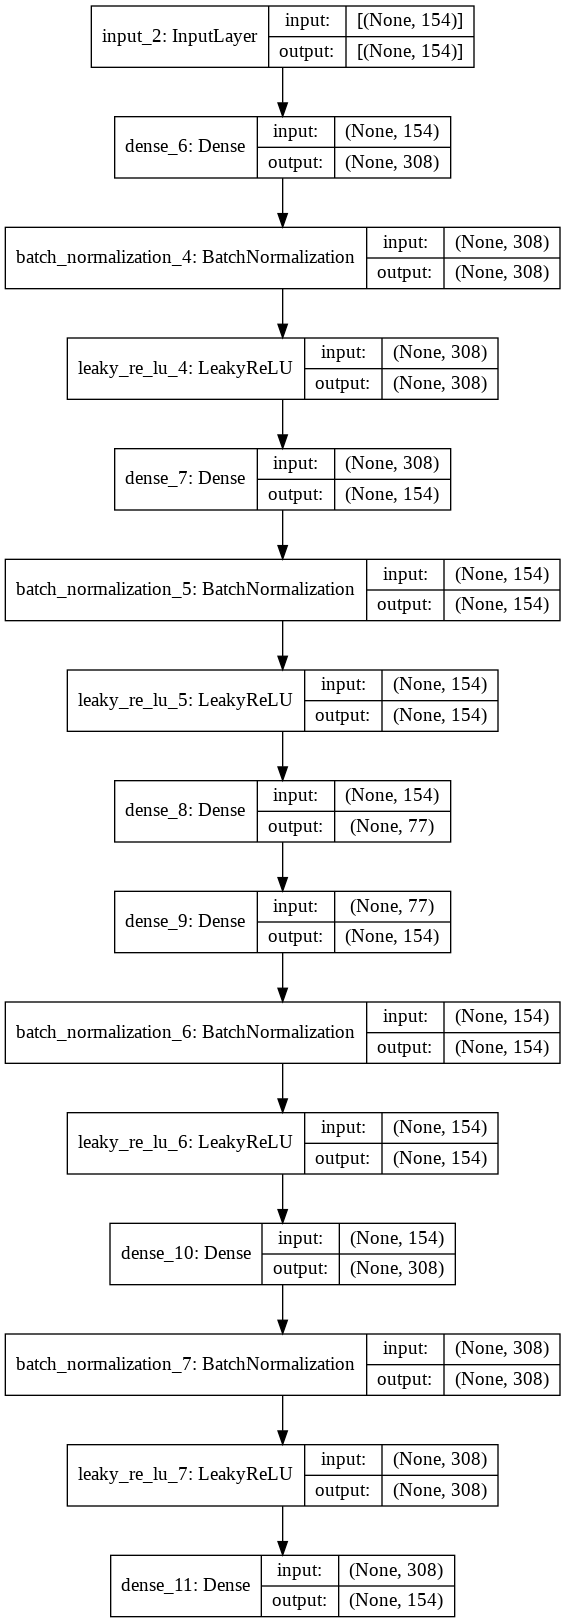

In [ ]:
# plot the autoencoder
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

#### Train

In [ ]:
start = datetime.now()

# fit the autoencoder model to reconstruct input, the output
output = autoencoder.fit(X_train, X_train, 
                    epochs=500, 
                    batch_size=256, 
                    verbose=1, 
                    validation_data=(X_test, X_test))

end = datetime.now()

Epoch 1/500
110/110 [==============================] - 2s 8ms/step - loss: 0.0879 - val_loss: 0.0507
Epoch 2/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0143 - val_loss: 0.0135
Epoch 3/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 4/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 5/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 6/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 7/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0092 - val_loss: 0.0096
Epoch 8/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 9/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 10/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0079 - val_lo

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:04:20.149186 [HH:MM:SS]


In [ ]:
autoencoder.save_weights('autoencoder_weights.h5')
autoencoder.load_weights('autoencoder_weights.h5')

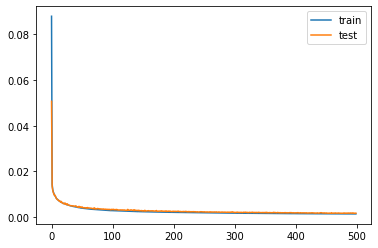

In [ ]:
# plot loss
pyplot.plot(output.history['loss'], label='train')
pyplot.plot(output.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Define an encoder model

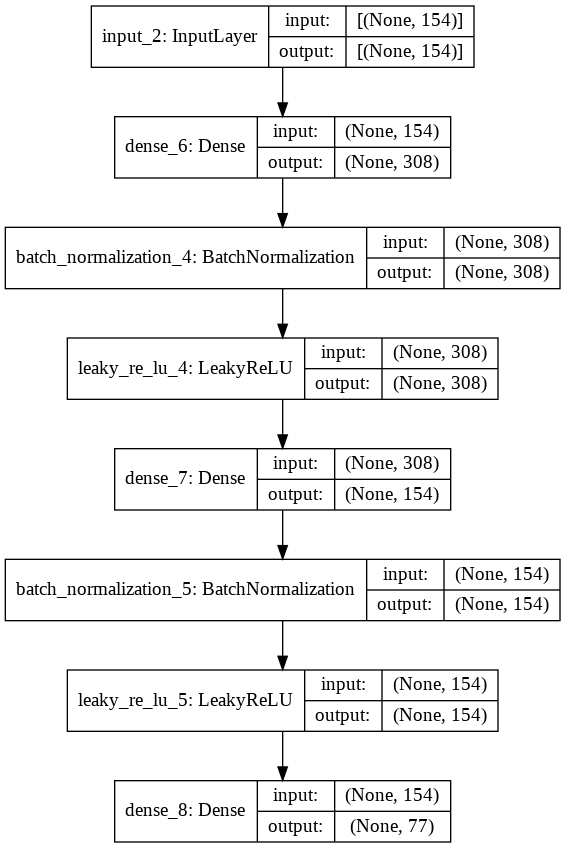

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, 
                outputs=bottleneck)

encoder.save_weights('encoder_weights.h5')
encoder.load_weights('encoder_weights.h5')

plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

In [ ]:
# save the model encoder to file
encoder.save('encoder.h5')

### Clustering

### k-means

In [ ]:
start = datetime.now() 

n_clusters = round(nb[1][0])

kmeans = KMeans(n_clusters=n_clusters, 
                n_jobs=100 #@param {type:"number"}
                , random_state=13)

kmeans.fit_predict(X_train)

end = datetime.now()

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:00:12.303822 [HH:MM:SS]


In [ ]:
# make predictions on the test set
y_pred_kmeans = kmeans.predict(X_test)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(X_test)
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]

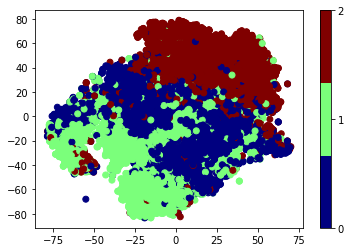

In [ ]:
cmap = plt.get_cmap('jet', n_clusters)
plt.scatter(vis_x, vis_y, 
            c=y_pred_kmeans, cmap=cmap)
plt.colorbar(ticks=np.arange(0, n_clusters + 1))
#plt.clim(-0.5, 9.5)
plt.show()

#### AE-k-means

In [ ]:
from tensorflow.keras.models import load_model

# load the model encoder from file
encoder = load_model('encoder.h5')

In [ ]:
# encode the train data
X_train_encode = encoder.predict(X_train)

# encode the test data
X_test_encode = encoder.predict(X_test)

In [ ]:
start = datetime.now()

n_clusters = n_clusters

ae_kmeans = KMeans(n_clusters=n_clusters, 
                n_jobs=100  #@param {type:"number"}
                , random_state=13)

ae_kmeans.fit_predict(X_train_encode)

end = datetime.now()

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:00:01.871231 [HH:MM:SS]


In [ ]:
# make predictions on the test set
y_pred = ae_kmeans.predict(X_test_encode)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(X_test_encode)
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]

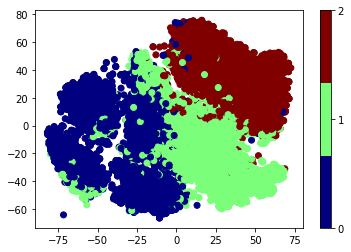

In [ ]:
cmap = plt.get_cmap('jet', n_clusters)
plt.scatter(vis_x, vis_y, 
            c=y_pred, cmap=cmap)
plt.colorbar(ticks=np.arange(0, n_clusters + 1))
#plt.clim(-0.5, 9.5)
plt.show()

### Results

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
score = davies_bouldin_score(X_test, y_pred_kmeans)
print (f'For n_clusters = {n_clusters}, Deep clustering silhouette score is {score}')

For n_clusters = 3, Deep clustering silhouette score is 7.846264845017099


In [ ]:
score = davies_bouldin_score(X_test_encode, y_pred)
print (f'For n_clusters = {n_clusters}, Deep clustering silhouette score is {score}')

For n_clusters = 3, Deep clustering silhouette score is 2.944150510272365


## Assassing cluster tendency w/ encoder

In [ ]:
X_test_encode.shape

(13860, 77)

In [ ]:
sample_rate = 0.1 #@param {type:"number"}
sample = pd.DataFrame(X_test_encode).sample(round(X_test_encode.shape[0]*sample_rate))
sample.shape

(1386, 77)

In [ ]:
from sklearn import datasets
from pyclustertend import vat, ivat, hopkins
from sklearn.preprocessing import scale
from datetime import datetime

Total time: 0:02:26.176482 [s]


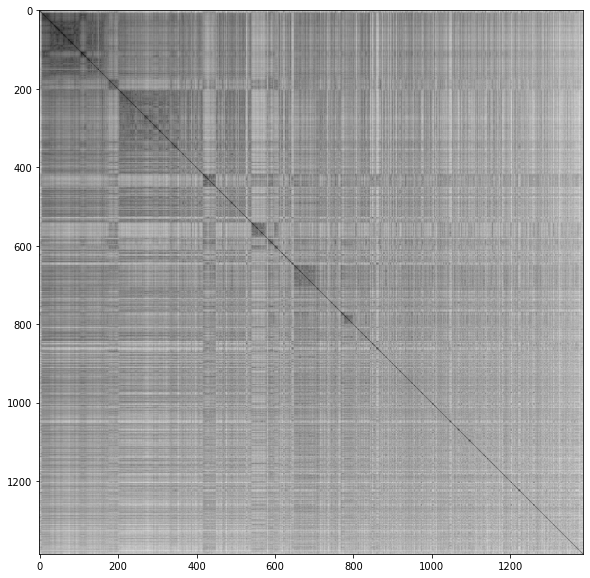

In [ ]:
start = datetime.now()

vat(sample)

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

Total time: 0:02:28.386262 [s]


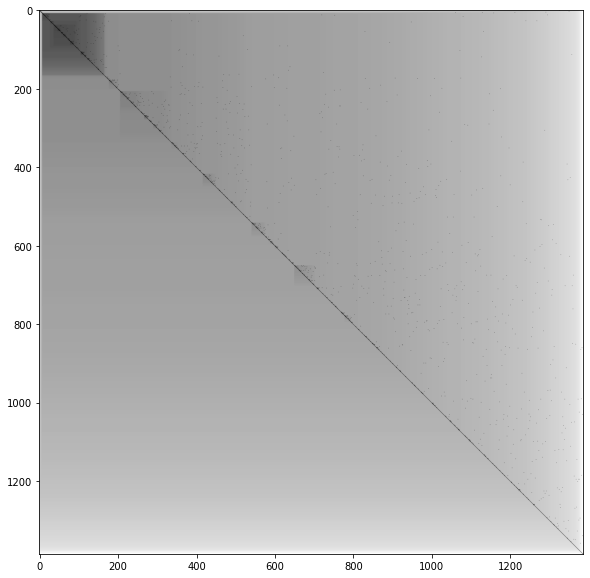

In [ ]:
start = datetime.now()

ivat(sample)

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

In [ ]:
start = datetime.now()

#hopkins = hopkins(X_test_encode, X_test_encode.shape[0]*0.1)
hopkins = hopkins(sample, sample.shape[0])

print(f'hopkins statistic: {hopkins} ') # HH:MM:SS format

end = datetime.now()

print(f'Total time: {end-start} [s]') # HH:MM:SS format

hopkins statistic: 0.29401455217217165 
Total time: 0:00:00.698127 [s]


## Determining the Optimal Number of Clusters w/ encoder

In [ ]:
start = datetime.now()

nb  = NbClust_package.NbClust(sample, 
                              distance = "euclidean", 
                              method = "kmeans",
                              min_nc = 2, 
                              max_nc = 20,
                              index = "dunn")

end = datetime.now()

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:00:03.035930 [HH:MM:SS]


In [ ]:
# Best number of clusters proposed by each index and the corresponding index value.
nb[1]

array([2.    , 0.2716])

In [ ]:
n_clusters = round(nb[1][0])

In [ ]:
start = datetime.now()

ae_kmeans = KMeans(n_clusters=n_clusters, 
                n_jobs=100 #@param {type:"number"}
                , random_state=13)

ae_kmeans.fit_predict(X_train_encode)

end = datetime.now()

In [ ]:
print(f'Total time: {end-start} [HH:MM:SS]') # HH:MM:SS format

Total time: 0:00:09.547032 [HH:MM:SS]


In [ ]:
# make predictions on the test set
y_pred = ae_kmeans.predict(X_test_encode)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(X_test_encode)
vis_x = x_embedded[:, 0]
vis_y = x_embedded[:, 1]

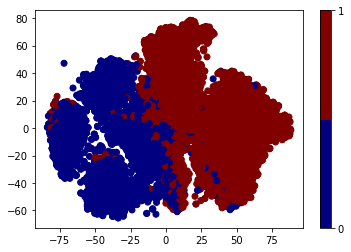

In [ ]:
cmap = plt.get_cmap('jet', n_clusters)
plt.scatter(vis_x, vis_y, 
            c=y_pred, cmap=cmap)
plt.colorbar(ticks=np.arange(0, n_clusters + 1))
#plt.clim(-0.5, 9.5)
plt.show()